In [34]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import csv

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
PATH_OF_DATA= '/content/gdrive/"My Drive/Colab Notebooks/GRIP HrsPerScore"'
!ls {PATH_OF_DATA}

'GRIP HrsPerScore.ipynb'		 StudentScores.csv
'GRIP HrsPerScore using sklearn.ipynb'


In [26]:
csv=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/GRIP HrsPerScore/StudentScores.csv")
x=csv['Hours'].to_numpy()
y=csv['Scores'].to_numpy()

In [27]:
dataframe={'Hours':x,'Marks':y}
print(dataframe['Hours'])
print(dataframe['Marks'])

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


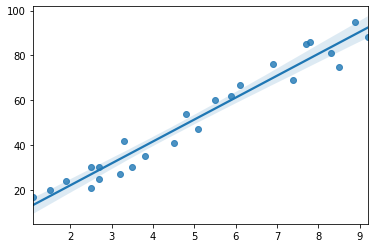

In [28]:
line=sns.regplot(data=dataframe, x="Hours", y="Marks")
#line.get_lines()[0].get_xdata()
#line.get_lines()[0].get_ydata()
# Provides the coordinates used by the line.

This reg plot provides a line, from which we can easily get the equation of the line and predict the marks on providing the hours=9.25.
Predicted values would be, slope=9.77 and bias=2.48, putting these in marks=hours*slope + bias would give us the result of 92.85.

In [29]:
weight=0
bias=0
y_pred=np.zeros(25)
loss=0
alpha=0.01
w_grad=0
b_grad=0
loss=0
total_w_grad=0
total_b_grad=0
total_loss=0

As this was a simple enough linear regression model, I didnt think that using any specific library would be necessary, so i used basic brute force to find the best alpha value, out of limited tries.

In [30]:
for j in range(50):
  total_loss/=len(x)
  total_w_grad/=len(x)
  total_b_grad/=len(x)
  weight=weight-alpha*total_w_grad
  bias=bias-alpha*total_b_grad
  for i in range(len(x)):
    y_pred[i]=bias+weight*x[i] # predicting Y with our bias and weight
    loss=y[i]-y_pred[i] # calculation loss
    w_grad=2*loss*-1*x[i] # calculating loss gradient with respect to weight
    b_grad=2*loss*-1 # calculation loss gradient with respect to bias
    total_loss+=loss*loss # MSE
    total_w_grad+=w_grad
    total_b_grad+=b_grad

In [31]:
z=bias + weight*9.25
print(z)
#It was surprisingly close to the linear regression of sklearn, i know both of them are same mathematically but still, i didnt expect it.

93.26792352610929


# Same thing but with SKLEARN

In [36]:
x=x.reshape(-1,1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[9.25]])
y_pred

array([92.90985477])